# Scraping the text from the link using Selenium

In [1]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import os.path
from os import path
import time
import re

In [2]:
currentDirectory = os.getcwd()
options = webdriver.ChromeOptions()
prefs = {
"download.default_directory": currentDirectory,
"download.prompt_for_download": False,
"download.directory_upgrade": True
}
options.add_experimental_option('prefs', prefs)


In [3]:
browser = webdriver.Chrome(options=options, executable_path=currentDirectory+'/chromedriver')

In [4]:
def get_details(url='https://huubsh.com/l/gibson-slash-les-paul-standard-november--3569'):
    browser.get(url)
    time.sleep(2)
    try:
        title = browser.find_element_by_xpath('/html/body/app-root/mat-sidenav-container/mat-sidenav-content/app-landing/app-landing-page/div[1]/p').text
        sub_title = browser.find_element_by_xpath('/html/body/app-root/mat-sidenav-container/mat-sidenav-content/app-landing/app-landing-page/div[2]/p').text
        description = browser.find_element_by_xpath('/html/body/app-root/mat-sidenav-container/mat-sidenav-content/app-landing/app-landing-page/div[3]/div').text
    except NoSuchElementException:
        return 'Not Found'
    return title, sub_title, description
    

In [5]:
get_details(url='https://huubsh.com/l/gibson-slash-les-paul-standard-november--3569')

('Gitarren Total Zurich',
 'Beware of the axe!',
 'GUITAR SERVICE\nMitten in Zürich bietet Gitarren Total dir einen professionellen und zuverlässigen Reparaturservice für Bässe, akustische und elektrische Gitarren. Ob kleiner Check-up oder grosse Operation: Wir untersuchen deine Liebste auf Body und Saiten – und holen Klänge aus deinem Instrument, die du niemals darin vermutet hättest.\nReparaturen und Service: Halsbruch, Winterschaden oder ganz normale Abnutzungserscheinungen? Bünde abrichten oder Neubundierung, PUs wechseln, Intonation oder Halsstab einstellen? Die Ausstattung unserer Werkstatt und unsere Erfahrung erlauben uns alles vom einfachen Service bis zur anspruchsvollen Reparatur. Gerne machen wir dir auch einen Kostenvoranschlag.\nNEUBUNDIERUNG\nDie Bespielbarkeit eines Instrumentes hängt wesentlich von der Qualität der Neubundierung ab. Wir verwandeln deine abgekämpfte Lieblingsgitarre in ein makellos bespielbares Instrument. Auf besondere Wünsche wie speziellen Bunddraht,

# Saving the scraped text from the link in the scrape.csv and creating a Dataframe

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('E:/nanos ML project/scrape.csv')
df

,url
0,https://huubsh.com/l/gibson-slash-les-paul-sta...


In [8]:
df[['text']] = df['url'].apply(get_details)
df

,url,text
0,https://huubsh.com/l/gibson-slash-les-paul-sta...,"(Gitarren Total Zurich, Beware of the axe!, GU..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     1 non-null      object
 1   text    1 non-null      object
dtypes: object(2)
memory usage: 144.0+ bytes


In [10]:
df['text'] = df.text.astype(str)

In [11]:
df['text'][0]

"('Gitarren Total Zurich', 'Beware of the axe!', 'GUITAR SERVICE\\nMitten in Zürich bietet Gitarren Total dir einen professionellen und zuverlässigen Reparaturservice für Bässe, akustische und elektrische Gitarren. Ob kleiner Check-up oder grosse Operation: Wir untersuchen deine Liebste auf Body und Saiten – und holen Klänge aus deinem Instrument, die du niemals darin vermutet hättest.\\nReparaturen und Service: Halsbruch, Winterschaden oder ganz normale Abnutzungserscheinungen? Bünde abrichten oder Neubundierung, PUs wechseln, Intonation oder Halsstab einstellen? Die Ausstattung unserer Werkstatt und unsere Erfahrung erlauben uns alles vom einfachen Service bis zur anspruchsvollen Reparatur. Gerne machen wir dir auch einen Kostenvoranschlag.\\nNEUBUNDIERUNG\\nDie Bespielbarkeit eines Instrumentes hängt wesentlich von der Qualität der Neubundierung ab. Wir verwandeln deine abgekämpfte Lieblingsgitarre in ein makellos bespielbares Instrument. Auf besondere Wünsche wie speziellen Bunddra

# Extracting the most relevant words from the webpage using NLP

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [13]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aagar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [15]:
stop_words = set(stopwords.words("german"))
print(sorted(stop_words))

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'das', 'dass', 'dasselbe', 'dazu', 'daß', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'dem', 'demselben', 'den', 'denn', 'denselben', 'der', 'derer', 'derselbe', 'derselben', 'des', 'desselben', 'dessen', 'dich', 'die', 'dies', 'diese', 'dieselbe', 'dieselben', 'diesem', 'diesen', 'dieser', 'dieses', 'dir', 'doch', 'dort', 'du', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'es', 'etwas', 'euch', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'ihm', 'ihn', 'ihnen', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'i

# Pre-process the data to get a cleaned, normalized text corpus

In [16]:
corpus = []
ds_count = len(df.text)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(df['text'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

# vectorizing the corpus

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words=stop_words)
X=cv.fit_transform(corpus)

In [18]:
print(X)

  (0, 47)	3
  (0, 138)	2
  (0, 159)	1
  (0, 17)	1
  (0, 110)	1
  (0, 137)	1
  (0, 9)	1
  (0, 52)	1
  (0, 131)	3
  (0, 102)	1
  (0, 125)	1
  (0, 19)	1
  (0, 119)	1
  (0, 160)	1
  (0, 135)	1
  (0, 123)	1
  (0, 134)	1
  (0, 4)	1
  (0, 30)	1
  (0, 64)	1
  (0, 22)	1
  (0, 148)	1
  (0, 51)	1
  (0, 111)	1
  (0, 147)	1
  :	:
  (0, 140)	1
  (0, 152)	1
  (0, 107)	1
  (0, 97)	1
  (0, 5)	1
  (0, 79)	1
  (0, 114)	1
  (0, 126)	1
  (0, 11)	1
  (0, 78)	1
  (0, 94)	1
  (0, 48)	1
  (0, 35)	1
  (0, 32)	1
  (0, 39)	1
  (0, 34)	1
  (0, 151)	1
  (0, 13)	1
  (0, 112)	1
  (0, 40)	1
  (0, 154)	1
  (0, 113)	1
  (0, 49)	1
  (0, 87)	1
  (0, 66)	1


In [19]:
list(cv.vocabulary_.keys())[:10]

['gitarren',
 'total',
 'zurich',
 'beware',
 'of',
 'the',
 'axe',
 'guitar',
 'service',
 'nmitten']

# View most frequently occuring keywords

In [20]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar graph

In [21]:
top_words = get_top_n_words(corpus, n=10)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)

         Keyword  Frequency
0     instrument          5
1       gitarren          3
2        service          3
3          total          2
4         saiten          2
5           ganz          2
6  neubundierung          2
7             pu          2
8        unserer          2
9          gerne          2


# Barplot of most freq words

[Text(0, 0, 'instrument'),
 Text(1, 0, 'gitarren'),
 Text(2, 0, 'service'),
 Text(3, 0, 'total'),
 Text(4, 0, 'saiten'),
 Text(5, 0, 'ganz'),
 Text(6, 0, 'neubundierung'),
 Text(7, 0, 'pu'),
 Text(8, 0, 'unserer'),
 Text(9, 0, 'gerne')]

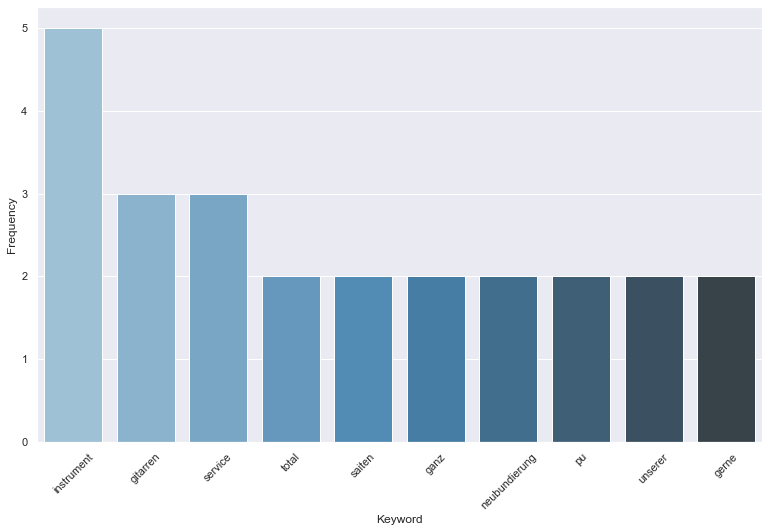

In [22]:
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)

# Storing the top 10 words in the csv as output

In [23]:
top_df.to_csv('relevant' + '_top_words.csv')